## Install Packages

In [739]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Load Dataset

In [740]:
df = pd.read_csv("boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Preprocessing

Data tersebut tentang prediksi harga rumah (medv) di kota Boston, fitur:
- Criminal rate (crim)
- Residential land zoned proportion (zn)
- Non-retail business acres proportion (indus)
- Is bounds with river (chas)
- Nitrogen oxides concentration (nox)
- Number rooms average (rm)
- Owner age proportion (age)
- Weighted distance to cities (dis)
- Accessibility index (rad)
- Tax rate (tax)
- Pupil-teacher ratio (ptratio)
- Black proportion (black)
- Percent lower status (lstat)


### Data Cleaning

In [741]:
# Handling Missing Values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [742]:
# Handling Duplicates
df.duplicated().sum()

0

In [743]:
#Split feature and target
X = df.drop(columns='medv') #dependent variables
y = df[['medv']] #independent to be predicted

### Outliers Handling

In [744]:
# Statistical Review
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [745]:
# Choosing Features
bst = list(df)[:-1]
bst

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

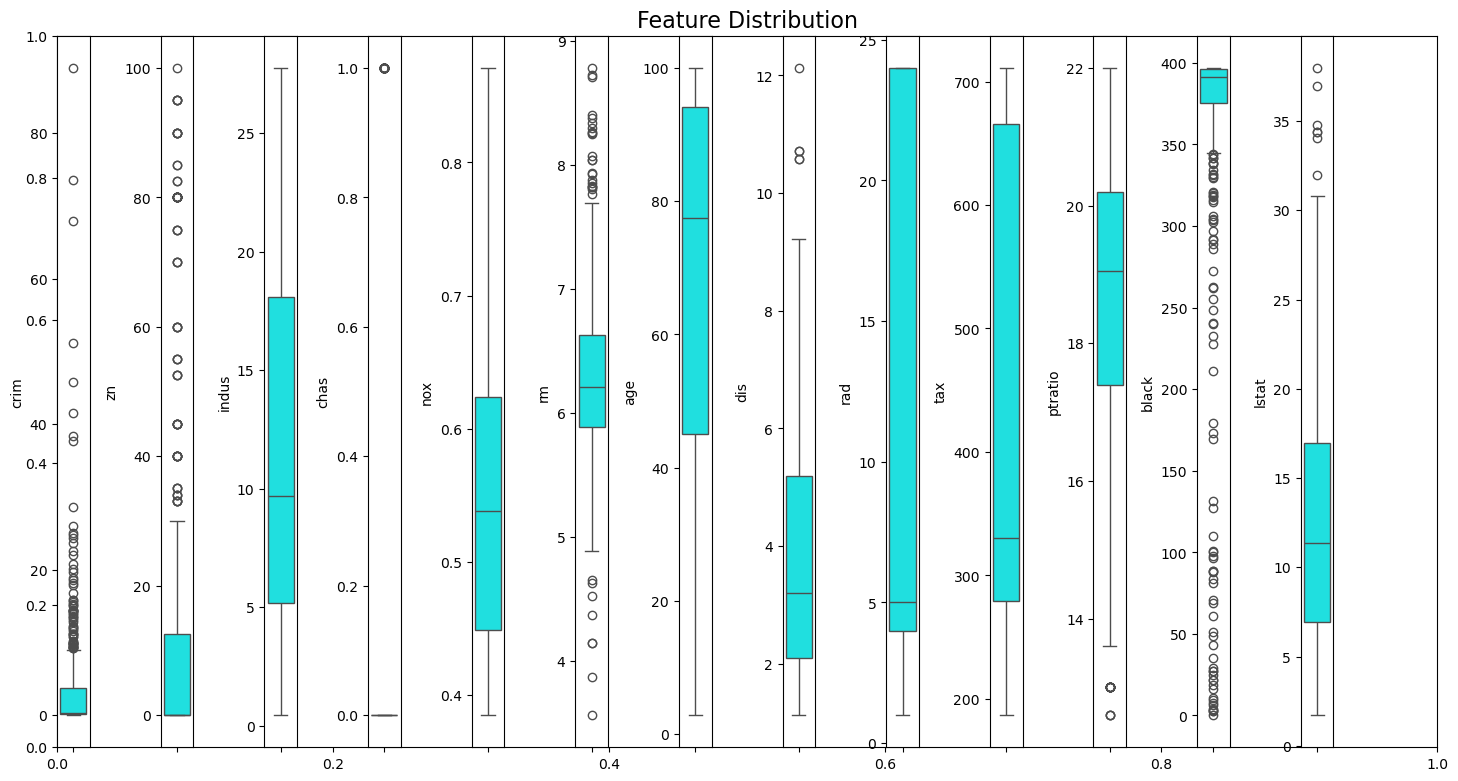

In [746]:
# Checking Outliers
plt.figure(figsize=(15, 8))
plt.title("Feature Distribution", fontsize=16)
for i in range(0, len(bst)):
    plt.subplot(1, 14, i+1)
    sns.boxplot(y=df[bst[i]],color='cyan')
    plt.tight_layout()
plt.show()

Dari grafik diatas bisa kita lihat beberapa feature mengandung outliers = `crim`, `zn`, `rm`, `black`, `lstat`

In [747]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outliers di luar batas 1.5*IQR
boston_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

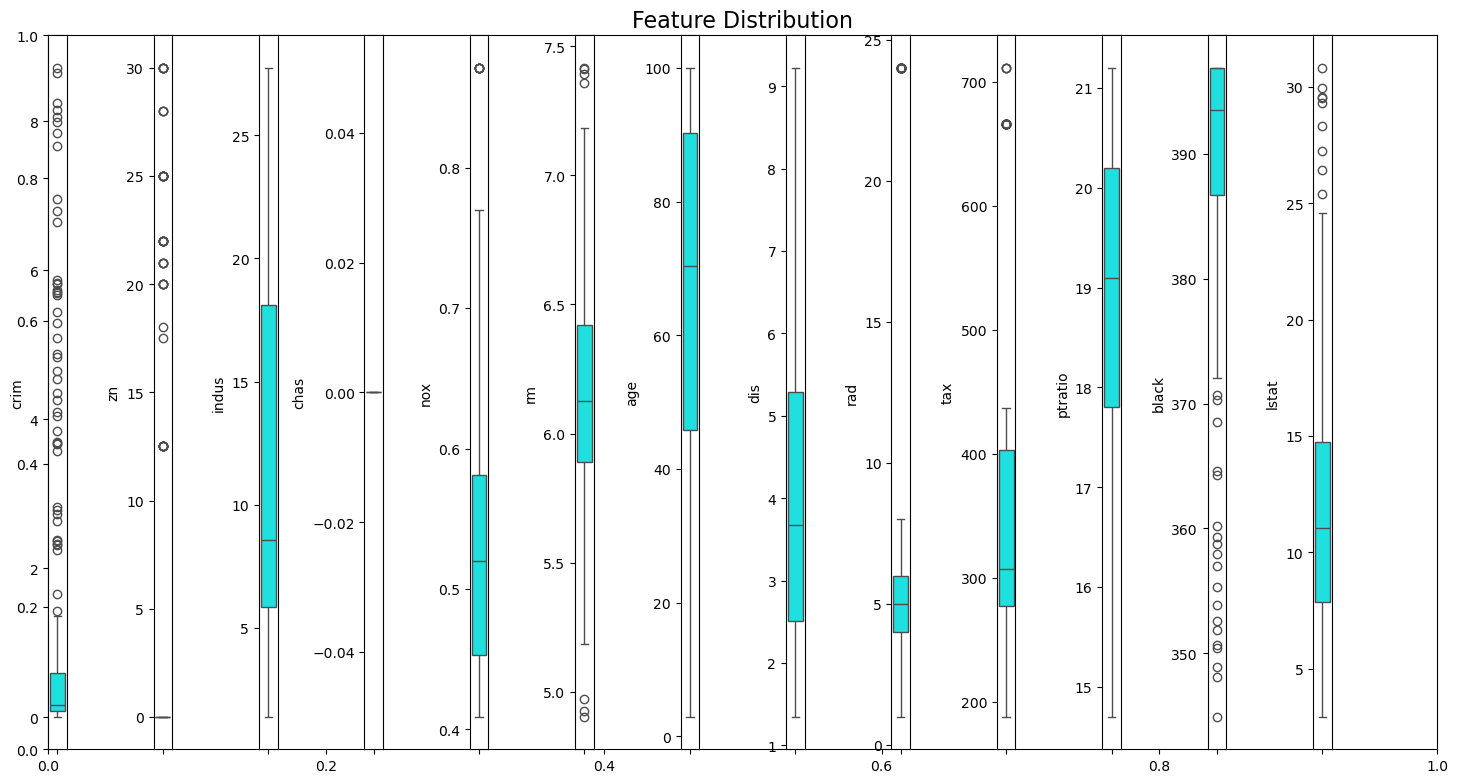

In [748]:
plt.figure(figsize=(15, 8))
plt.title("Feature Distribution", fontsize=16)
for i in range(0, len(bst)):
    plt.subplot(1, 14, i+1)
    sns.boxplot(y = boston_clean[bst[i]],color='cyan')
    plt.tight_layout()
plt.show()

In [749]:
print (boston_clean.shape)
print (df.shape)

(268, 14)
(506, 14)


Karena data hanya sedikit dan hampir 50% terbuang, kita akan Menggunakan Log Transform untuk handling Outliers

In [750]:
# Log Transform
df['crim'] = np.log10(df['crim'] + 1)
df['zn'] = np.log10(df['zn'] + 1)
df['lstat'] = np.log10(df['lstat'] + 1)

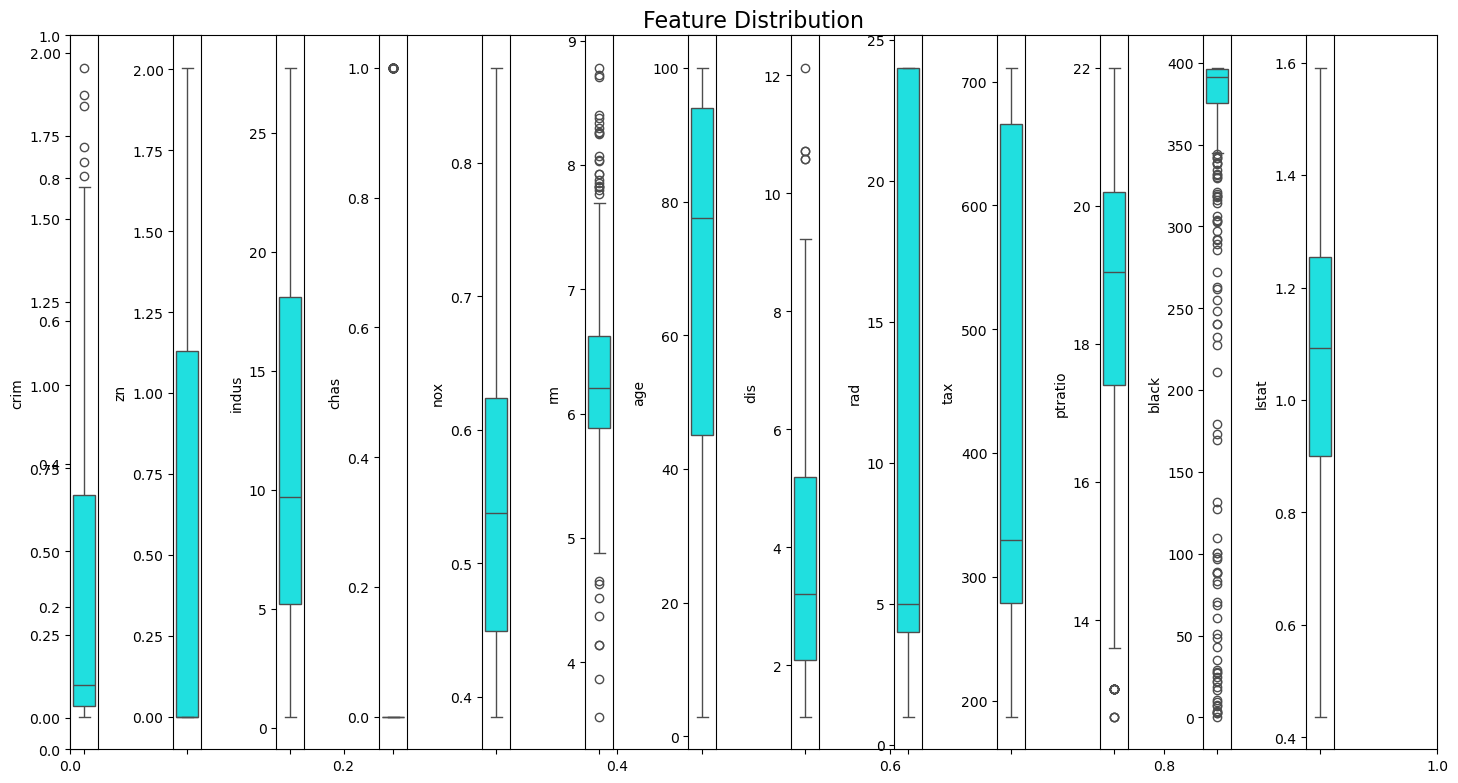

In [751]:
# Checking Outliers
plt.figure(figsize=(15, 8))
plt.title("Feature Distribution", fontsize=16)
for i in range(0, len(bst)):
    plt.subplot(1, 14, i+1)
    sns.boxplot(y=df[bst[i]],color='cyan')
    plt.tight_layout()
plt.show()

Menggunakan Log Transform tidak bagus untuk fitur `rm` dan `black`, namun sisanya berjalan baik.

### Handling Multicollinearity

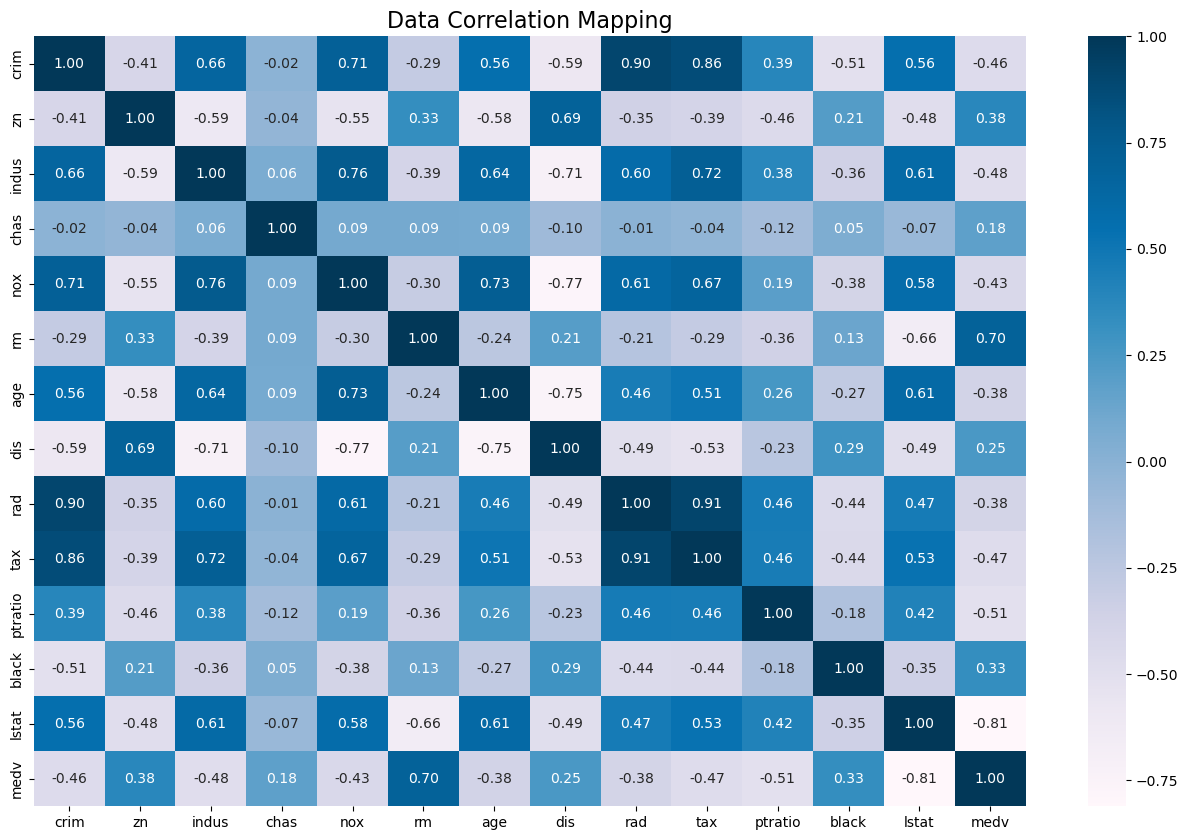

In [752]:
#Heatmap
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "PuBu")

plt.title("Data Correlation Mapping", fontsize = 16)
plt.show()

several features are highly correlated.
- `crim` - nox,rad,tax
- `indus` - nox, dis, tax
- `nox` - crim, indus, age, dis
- `age` - nox, dis
- `dis` - indus, nox, age
- `rad` - crim, tax
- `tax` - crim, indus, rad

we're gonna choose `rad`, `nox`, `dis`, `tax`


In [753]:
df = df.drop(['rad', 'tax','nox','dis'], axis=1) 

<Axes: >

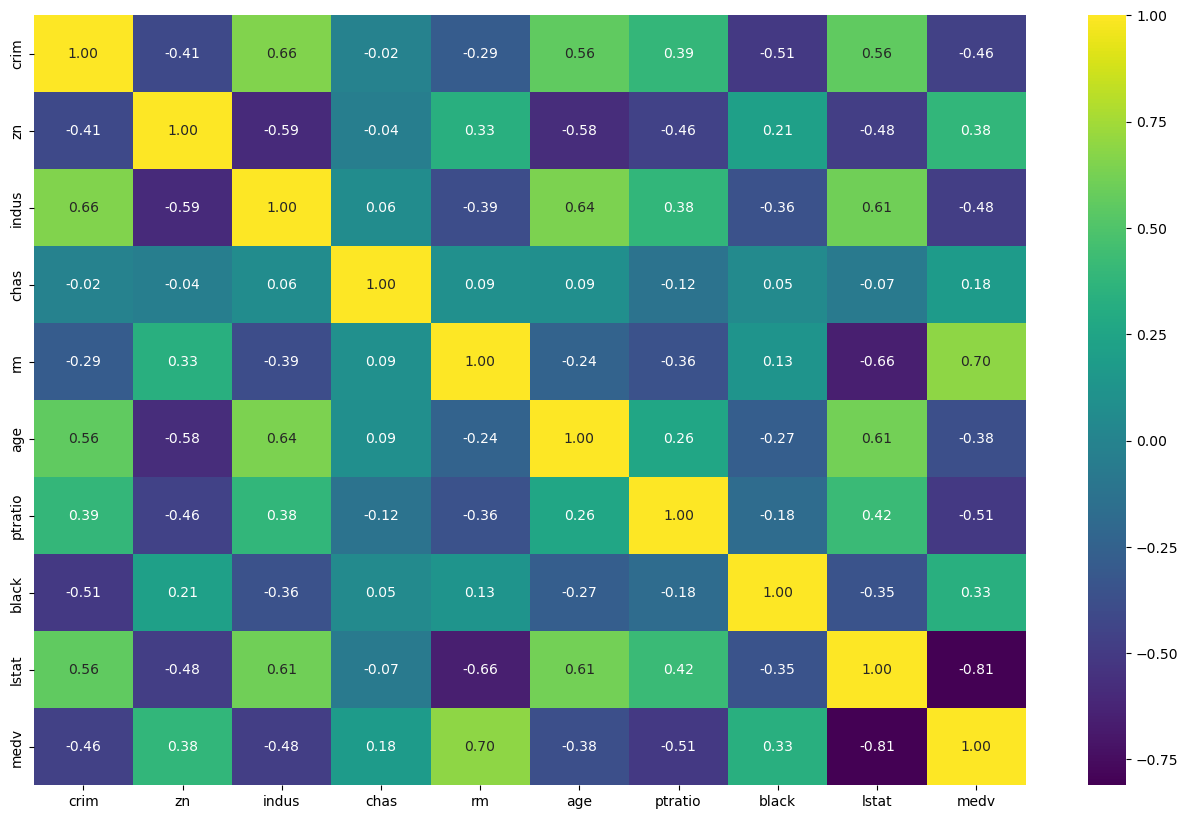

In [754]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "viridis")

CLEAR! No correlation above 0.7

### Scaling

In [755]:
X = df.drop(['medv'], axis=1)
y = df[['medv']]

In [756]:
feature = list(X)

In [757]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [758]:
new_df = pd.DataFrame(data = X_std, columns = feature)
new_df.head()

,crim,zn,indus,chas,rm,age,ptratio,black,lstat
0,-0.789960,1.229330,-1.287909,-0.272599,0.413672,-0.120013,-1.459000,0.441052,-1.276118
1,-0.769755,-0.589091,-0.593381,-0.272599,0.194274,0.367166,-0.303094,0.441052,-0.295491
2,-0.769774,-0.589091,-0.593381,-0.272599,1.282714,-0.265812,-0.303094,0.396427,-1.597382
3,-0.764946,-0.589091,-1.306878,-0.272599,1.016303,-0.809889,0.113032,0.416163,-2.050937
4,-0.730775,-0.589091,-1.306878,-0.272599,1.228577,-0.511180,0.113032,0.441052,-1.170492


## Feature Selection with PCA

### PCA

In [759]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8','pc9'])
pdf['medv'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,medv
0,-2.512432,0.136357,0.367180,-0.459317,-0.804983,0.025612,-0.257191,-0.212959,0.754101,24.0
1,-0.567674,-0.084650,-0.487618,0.495742,-0.634111,-0.707205,-0.357881,-0.184488,0.186875,21.6
2,-1.654321,0.413504,0.078298,1.491377,-0.266470,-0.697335,0.270498,-0.167358,0.293413,34.7
3,-2.148989,-0.040872,0.010255,1.599118,0.426377,-0.804169,0.255201,-0.643151,0.557805,33.4
4,-1.725357,-0.005962,-0.029968,1.454971,0.143547,-0.690941,-0.274667,-0.585548,-0.017771,36.2


### Scree Plot

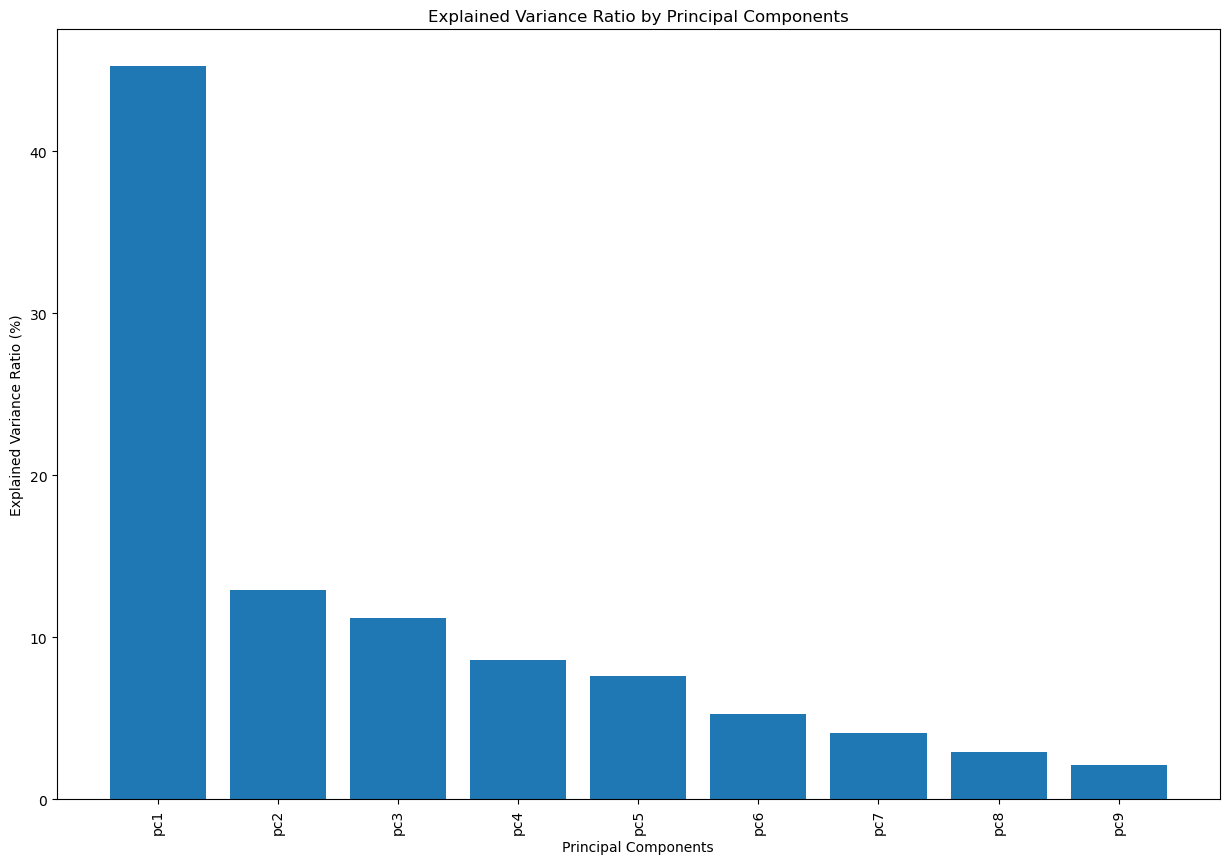

In [760]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8','pc9'], pca.explained_variance_ratio_ * 100)

plt.xticks(rotation=90)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [761]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [4.08128733 1.16595399 1.00959019 0.77578239 0.68678431 0.47356625
 0.37164844 0.26452985 0.18867903]
Explained variance ratio: [45.25801718 12.92944145 11.19549952  8.60276912  7.61585593  5.25144836
  4.12126619  2.93341176  2.09229048]


In [762]:
result = np.cumsum(pca.explained_variance_ratio_*100)
index = 1

for i in result:
    print("gunakan sampai fitur ke-",index ,"Represent =", i)
    index+=1

gunakan sampai fitur ke- 1 Represent = 45.25801717926323
gunakan sampai fitur ke- 2 Represent = 58.18745863155161
gunakan sampai fitur ke- 3 Represent = 69.38295815381079
gunakan sampai fitur ke- 4 Represent = 77.9857272764063
gunakan sampai fitur ke- 5 Represent = 85.60158320545543
gunakan sampai fitur ke- 6 Represent = 90.85303156622786
gunakan sampai fitur ke- 7 Represent = 94.97429775285374
gunakan sampai fitur ke- 8 Represent = 97.90770951723998
gunakan sampai fitur ke- 9 Represent = 100.0


Kita akan gunakan 6 fitur, karena sudah represent 90% lebih data original

### Feature Reduction

In [763]:
pca = PCA(n_components=6)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,-2.512432,0.136357,0.367180,-0.459317,-0.804983,0.025612
1,-0.567674,-0.084650,-0.487618,0.495742,-0.634111,-0.707205
2,-1.654321,0.413504,0.078298,1.491377,-0.266470,-0.697335
3,-2.148989,-0.040872,0.010255,1.599118,0.426377,-0.804169
4,-1.725357,-0.005962,-0.029968,1.454971,0.143547,-0.690941


## Data Split

### Original

In [764]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 9)
(102, 9)
(404, 1)
(102, 1)


VS

### PCA

In [765]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y, test_size = 0.2, random_state=5)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(404, 6)
(102, 6)
(404, 1)
(102, 1)


## Model Training and Evaluation

### Linier Regression

In [766]:
from sklearn.linear_model import LinearRegression

# define the original
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [767]:
# define the PCA model
pca_lin_reg = LinearRegression()
pca_lin_reg.fit(X_train_pca, y_train_pca)

LinearRegression()

### Linear Regression Evaluation

In [768]:
# Evaluasi Linreg
lin_pred = lin_reg.predict(X_test)

print('R-squared for test data is {}'.format((r2_score(lin_pred, y_test))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(lin_pred, y_test))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(lin_pred, y_test))*100))
print('MAE for test data is {}'.format(mean_absolute_error(lin_pred, y_test)))

R-squared for test data is 74.27313835928679
RMSE for test data is 4.201188697478786
MAPE for test data is 23.59195522827499
MAE for test data is 3.141787257264025


In [769]:
# Evaluasi Lin reg with PCA
lin_pred_pca = pca_lin_reg.predict(X_test_pca)

print('R-squared for test data is {}'.format((r2_score(lin_pred_pca, y_test_pca))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(lin_pred_pca, y_test_pca))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(lin_pred_pca, y_test_pca))*100))
print('MAE for test data is {}'.format(mean_absolute_error(lin_pred_pca, y_test_pca)))

R-squared for test data is 76.26398362423356
RMSE for test data is 4.125158050853129
MAPE for test data is 58.26679400242776
MAE for test data is 2.947830340883353


### Random Forest Regression

In [770]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Ori
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [771]:
# Random Forest Regressor PCA
rf_reg_pca = RandomForestRegressor(random_state=42)
rf_reg_pca.fit(X_train_pca, y_train_pca)

RandomForestRegressor(random_state=42)

### Random Forest Regression Evaluation

In [772]:
# Evaluasi Random Forest Ori
rf_reg_pred = rf_reg.predict(X_test)

print('R-squared for test data is {}'.format((r2_score(rf_reg_pred, y_test))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(rf_reg_pred, y_test))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(rf_reg_pred, y_test))*100))
print('MAE for test data is {}'.format(mean_absolute_error(rf_reg_pred, y_test)))

R-squared for test data is 83.3239372235852
RMSE for test data is 3.3665568303768256
MAPE for test data is 11.971909716812425
MAE for test data is 2.3456176470588233


In [773]:
# Evaluasi Random Forest PCA
rf_reg_pca_pred = rf_reg_pca.predict(X_test_pca)

print('R-squared for test data is {}'.format((r2_score(rf_reg_pca_pred, y_test_pca))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(rf_reg_pca_pred, y_test_pca))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(rf_reg_pca_pred, y_test_pca))*100))
print('MAE for test data is {}'.format(mean_absolute_error(rf_reg_pca_pred, y_test_pca)))

R-squared for test data is 72.80803785438746
RMSE for test data is 4.1288672365265935
MAPE for test data is 13.943837538703798
MAE for test data is 2.768480392156862


### Decision Tree Regressor

In [774]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Original
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [775]:
# Decision Tree Regressor with PCA
tree_reg_pca = DecisionTreeRegressor()
tree_reg_pca.fit(X_train_pca, y_train_pca)

DecisionTreeRegressor()

### Decision Tree Regressor Evaluation

In [776]:
# Evaluasi Decision Tree Regressor Original
tree_pred = tree_reg.predict(X_test)

print('R-squared for test data is {}'.format((r2_score(tree_pred, y_test))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(tree_pred, y_test))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(tree_pred, y_test))*100))
print('MAE for test data is {}'.format(mean_absolute_error(tree_pred, y_test)))

R-squared for test data is 63.598446919979935
RMSE for test data is 5.654479397336412
MAPE for test data is 15.349057278888637
MAE for test data is 3.398039215686274


In [777]:
# Evaluasi Decision Tree Regressor PCA
tree_pca_pred = rf_reg_pca.predict(X_test_pca)

print('R-squared for test data is {}'.format((r2_score(tree_pca_pred, y_test_pca))*100))
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(tree_pca_pred, y_test_pca))))
print('MAPE for test data is {}'.format((mean_absolute_percentage_error(tree_pca_pred, y_test_pca))*100))
print('MAE for test data is {}'.format(mean_absolute_error(tree_pca_pred, y_test_pca)))

R-squared for test data is 72.80803785438746
RMSE for test data is 4.1288672365265935
MAPE for test data is 13.943837538703798
MAE for test data is 2.768480392156862


## Summary

In [781]:
print('RMSE for Linear Regression is {}'.format(np.sqrt(mean_squared_error(lin_pred, y_test))))
print('RMSE for Linear Regression PCA is {}'.format(np.sqrt(mean_squared_error(lin_pred_pca, y_test_pca))))
print('RMSE for Random Forest Regressor is {}'.format(np.sqrt(mean_squared_error(rf_reg_pred, y_test))))
print('RMSE for Random Forest Regressor PCA is {}'.format(np.sqrt(mean_squared_error(rf_reg_pca_pred, y_test_pca))))
print('RMSE for Decision Tree Regressor is {}'.format(np.sqrt(mean_squared_error(tree_pred, y_test))))
print('RMSE for Decision Tree Regressor PCA is {}'.format(np.sqrt(mean_squared_error(tree_pca_pred, y_test_pca))))

RMSE for Linear Regression is 4.201188697478786
RMSE for Linear Regression PCA is 4.125158050853129
RMSE for Random Forest Regressor is 3.3665568303768256
RMSE for Random Forest Regressor PCA is 4.1288672365265935
RMSE for Decision Tree Regressor is 5.654479397336412
RMSE for Decision Tree Regressor PCA is 4.1288672365265935


**Summary :**
- Untuk Linear Regression terdapat sedikit penurunan RMSE setelah PCA
- Untuk RF Regressor malah terjadi peningkataan
- Untuk Decision Tree Regressor terjadi penurunan RMSE setelah PCA

**Model terbaik adalah RF Regressor with PCA dengan**
r-squared = 83% bisa menjelaskan datanya
RMSE = 3.36 sangat kecil!
